In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pandas as pd
import time

In [3]:
import json
from twython import Twython
import ConfigParser
from dateutil import parser

propertiesFile = "my.properties"
cp = ConfigParser.ConfigParser()
cp.readfp(open(propertiesFile))

APP_KEY            = cp.get('Params', 'app_key')
APP_SECRET         = cp.get('Params', 'app_secret')
OAUTH_TOKEN        = cp.get('Params', 'oauth_token')
OAUTH_TOKEN_SECRET = cp.get('Params', 'oauth_token_secret')

twitter = Twython(APP_KEY, APP_SECRET, OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

In [4]:
tname = 'noellesio'
data = twitter.show_user(screen_name=tname)

In [5]:
dts = []
tweets = twitter.get_user_timeline(screen_name=tname, count=200)
while len(tweets) > 0:
    for tweet in tweets:
        dt = pd.to_datetime(tweet['created_at']) - pd.DateOffset(hours=8)
        dts.append(dt)
    last = tweet['id']
    print last
    tweets = twitter.get_user_timeline(screen_name=tname, count=200, max_id = last-1)
    time.sleep(1)

535526829268819968
425374454148268034
136161542638010369
1790402056


In [6]:
tseries = pd.Series(dts)
df = pd.DataFrame({'dow': tseries.apply(lambda x: x.dayofweek), 'hour': tseries.apply(lambda x: x.hour), 'c': 1})

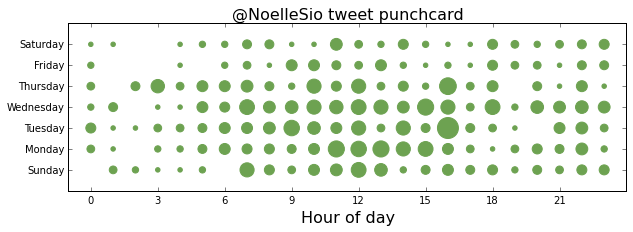

In [9]:
gb = pd.DataFrame(df.groupby(['dow', 'hour'])['c'].sum())
gb.reset_index(inplace=True)
plt.figure(figsize=(10,3))
plt.scatter(gb.hour, gb.dow, s=gb.c * 20, color='#6da251')
plt.xlabel('Hour of day', fontsize=16)
plt.title('@NoelleSio tweet punchcard', fontsize=16)
plt.xlim(-1, 24)
plt.yticks(np.arange(7), ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
h=np.arange(8)*3
plt.xticks(h, h)
plt.savefig('noelle.png',bbox_inches='tight')
plt.show()